In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


## Checking for Missing Values

In [4]:
train.isnull().sum()

EmpID                         0
EmpName                       0
LanguageOfCommunication       0
Age                           0
Gender                        0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
GraduationYear                0
CurrentCTC                    0
ExpectedCTC                   0
MartialStatus                 0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      3336
FitmentPercent                0
dtype: int64

## Analysing continous data

In [5]:
train.describe()

,EmpID,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent
count,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000
mean,13150.781239,30.691242,7.100257,6.547746,2014.452254,18.076951,25.061488,3.392085,11.967021,75.880093
std,6475.019626,3.881378,1.346539,3.426920,3.426920,7.208130,7.478119,1.044676,4.897836,14.894207
min,2001.000000,24.000000,4.000000,1.000000,2009.000000,6.000000,10.000000,1.000000,4.000000,33.530000
25%,7501.000000,28.000000,6.000000,4.000000,2012.000000,12.000000,19.000000,3.000000,8.000000,68.720000
50%,13173.000000,31.000000,7.000000,7.000000,2014.000000,18.000000,25.000000,3.000000,12.000000,78.110000
75%,18718.000000,34.000000,8.000000,9.000000,2017.000000,24.000000,31.000000,4.000000,16.000000,87.990000
max,24390.000000,42.000000,10.000000,12.000000,2020.000000,30.000000,40.000000,5.000000,20.000000,95.500000


In [6]:
len(train['FitmentPercent'].unique())

4578

## Understanding Columns

In [7]:
train.columns

Index([u'EmpID', u'EmpName', u'LanguageOfCommunication', u'Age', u'Gender',
       u'JobProfileIDApplyingFor', u'HighestDegree', u'DegreeBranch',
       u'GraduatingInstitute', u'LatestDegreeCGPA', u'YearsOfExperince',
       u'GraduationYear', u'CurrentCTC', u'ExpectedCTC', u'MartialStatus',
       u'EmpScore', u'CurrentDesignation', u'CurrentCompanyType',
       u'DepartmentInCompany', u'TotalLeavesTaken', u'BiasInfluentialFactor',
       u'FitmentPercent'],
      dtype='object')

In [8]:
# import seaborn as sns
# sns.countplot(train['FitmentPercent'],hue = train['GraduatingInstitute'])

## Verifying and Analysing Predictor Variables distribution

In [9]:
train['FitmentPercent'].describe()

count    13645.000000
mean        75.880093
std         14.894207
min         33.530000
25%         68.720000
50%         78.110000
75%         87.990000
max         95.500000
Name: FitmentPercent, dtype: float64

In [10]:
train['BiasInfluentialFactor'].describe()

count            10309
unique               9
top       DegreeBranch
freq              2858
Name: BiasInfluentialFactor, dtype: object

In [11]:
train['BiasInfluentialFactor'].unique()

array(['YearsOfExperince', nan, 'Gender', 'DegreeBranch',
       'CurrentCompanyType', 'MartialStatus', 'HighestDegree', 'EmpScore',
       'Ethinicity', 'LatestDegreeCGPA'], dtype=object)

## Dropping Predictor Variables for EDA on Training Data

In [13]:
train_df = train.drop('BiasInfluentialFactor',axis=1)
train_df = train_df.drop('FitmentPercent',axis=1)

In [14]:
train_df.columns

Index([u'EmpID', u'EmpName', u'LanguageOfCommunication', u'Age', u'Gender',
       u'JobProfileIDApplyingFor', u'HighestDegree', u'DegreeBranch',
       u'GraduatingInstitute', u'LatestDegreeCGPA', u'YearsOfExperince',
       u'GraduationYear', u'CurrentCTC', u'ExpectedCTC', u'MartialStatus',
       u'EmpScore', u'CurrentDesignation', u'CurrentCompanyType',
       u'DepartmentInCompany', u'TotalLeavesTaken'],
      dtype='object')

In [15]:
train_df['DegreeBranch'].unique()

array(['Electrical', 'Artificial Intelligence', 'Computer Science',
       'Information Technology', 'Electronics',
       'Electrical and Electronics'], dtype=object)

In [16]:
categorical = []
numerical = []
for i in train_df.columns:
    if train[i].dtype == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

In [17]:
numerical_df = train_df[numerical]

In [18]:
numerical_df = numerical_df.drop('EmpID',axis=1)

In [19]:
numerical_df.describe()

,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken
count,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000
mean,30.691242,7.100257,6.547746,2014.452254,18.076951,25.061488,3.392085,11.967021
std,3.881378,1.346539,3.426920,3.426920,7.208130,7.478119,1.044676,4.897836
min,24.000000,4.000000,1.000000,2009.000000,6.000000,10.000000,1.000000,4.000000
25%,28.000000,6.000000,4.000000,2012.000000,12.000000,19.000000,3.000000,8.000000
50%,31.000000,7.000000,7.000000,2014.000000,18.000000,25.000000,3.000000,12.000000
75%,34.000000,8.000000,9.000000,2017.000000,24.000000,31.000000,4.000000,16.000000
max,42.000000,10.000000,12.000000,2020.000000,30.000000,40.000000,5.000000,20.000000


In [20]:
numerical_df['LatestDegreeCGPA'].unique()

array([ 7,  6,  5,  8,  9,  4, 10], dtype=int64)

In [21]:
numerical_df['GraduationYear'].unique()

array([2009, 2018, 2015, 2019, 2020, 2012, 2013, 2016, 2017, 2014, 2010,
       2011], dtype=int64)

## Visualising distribution of Predictor Variable - Fitment Percent

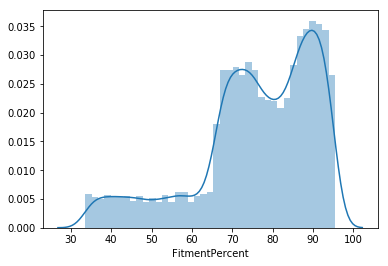

In [22]:
import seaborn as sns
sns.distplot(train['FitmentPercent'])
plt.show()

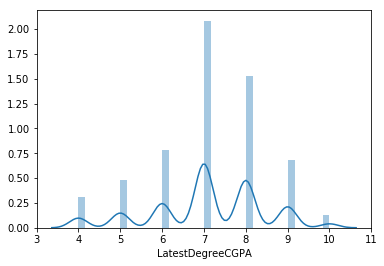

In [23]:
sns.distplot(numerical_df['LatestDegreeCGPA'])
plt.show()

In [24]:
# from platform import python_version
# print(python_version())

## As per below graph we can see Most of the employees have 3 and 4 EMP SCORE

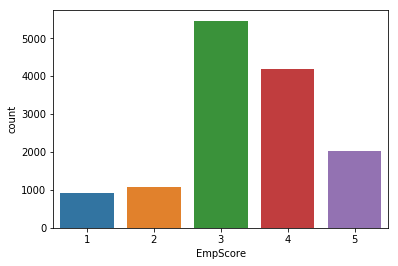

In [25]:
sns.countplot(numerical_df['EmpScore'])
plt.show()

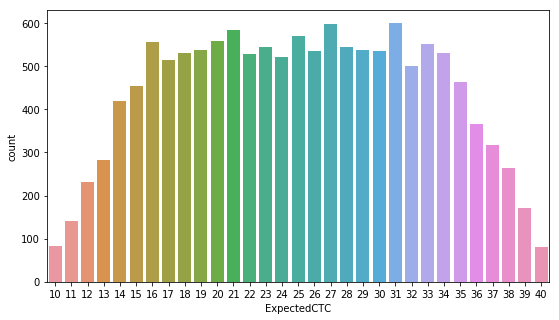

In [26]:
plt.figure(figsize=(9, 5))
sns.countplot(numerical_df['ExpectedCTC'])
plt.show()

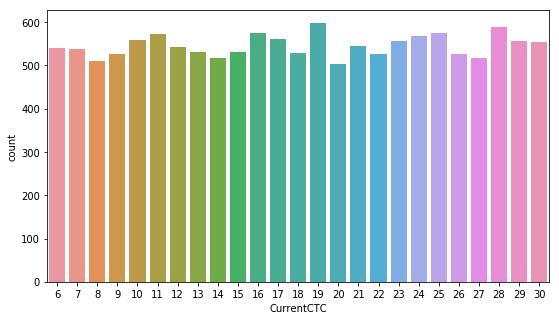

In [27]:
plt.figure(figsize=(9, 5))
sns.countplot(numerical_df['CurrentCTC'])
plt.show()

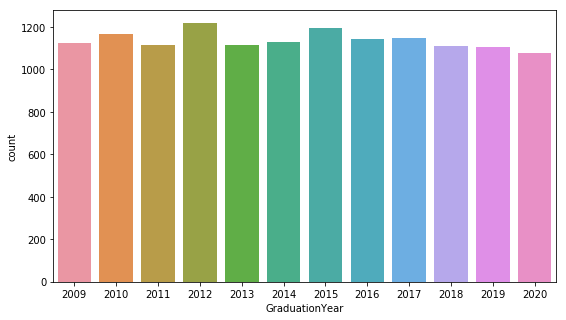

In [28]:
plt.figure(figsize=(9, 5))
sns.countplot(numerical_df['GraduationYear'])
plt.show()

In [29]:
numerical_df.columns

Index([u'Age', u'LatestDegreeCGPA', u'YearsOfExperince', u'GraduationYear',
       u'CurrentCTC', u'ExpectedCTC', u'EmpScore', u'TotalLeavesTaken'],
      dtype='object')

In [30]:
numerical_df.describe()

,Age,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken
count,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000,13645.000000
mean,30.691242,7.100257,6.547746,2014.452254,18.076951,25.061488,3.392085,11.967021
std,3.881378,1.346539,3.426920,3.426920,7.208130,7.478119,1.044676,4.897836
min,24.000000,4.000000,1.000000,2009.000000,6.000000,10.000000,1.000000,4.000000
25%,28.000000,6.000000,4.000000,2012.000000,12.000000,19.000000,3.000000,8.000000
50%,31.000000,7.000000,7.000000,2014.000000,18.000000,25.000000,3.000000,12.000000
75%,34.000000,8.000000,9.000000,2017.000000,24.000000,31.000000,4.000000,16.000000
max,42.000000,10.000000,12.000000,2020.000000,30.000000,40.000000,5.000000,20.000000


### As per below scatterplot we could see as Age increases , No. of YearsOfExperince also increases which is obvious

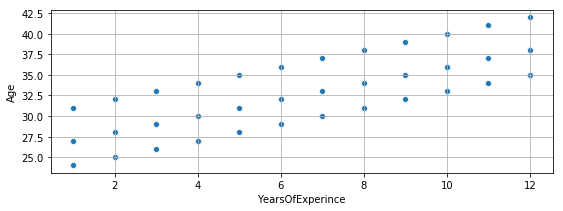

In [31]:
plt.figure(figsize=(9,3))
plt.grid()
sns.scatterplot(numerical_df['YearsOfExperince'],numerical_df['Age'])
plt.show()

In [32]:
#Above diagram shows positive corelation between two variables which is acceptable (Mutlicollinearity)

## Outlier analysis on few continous variable

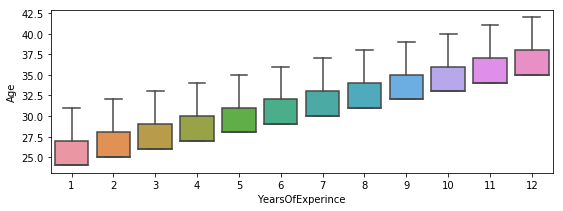

In [33]:
plt.figure(figsize=(9,3))
sns.boxplot(numerical_df['YearsOfExperince'],y=numerical_df['Age'])
plt.show()

In [34]:
# No outliers in multicollineared variable

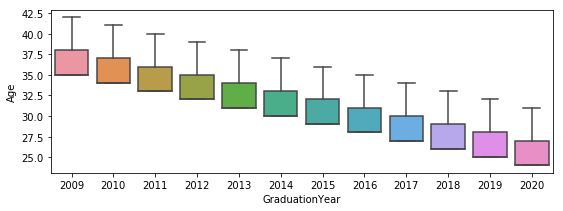

In [35]:
plt.figure(figsize=(9,3))
sns.boxplot(numerical_df['GraduationYear'],y=numerical_df['Age'])
plt.show()

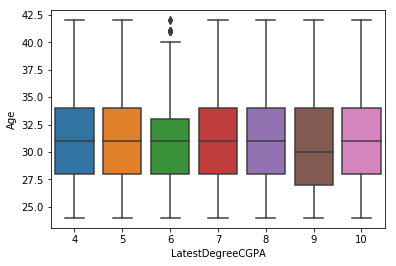

In [36]:
# No outliers in multicollineared variableplt.figure(figsize=(9,3))
sns.boxplot(numerical_df['LatestDegreeCGPA'],y=numerical_df['Age'])
plt.show()

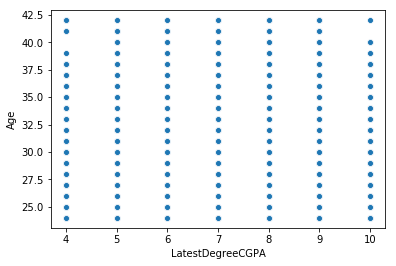

In [37]:
sns.scatterplot(numerical_df['LatestDegreeCGPA'],y=numerical_df['Age'])
plt.show()

## Trying to understand how is the expectation of employee salary when compared to his current CTC and which variable will be more useful for prediction

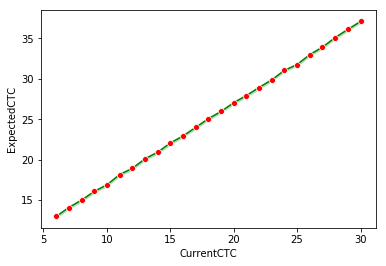

In [38]:
sns.lineplot(numerical_df['CurrentCTC'],numerical_df['ExpectedCTC'],marker='o',color='green', markerfacecolor = 'red')
plt.show()

In [39]:
categorical_df = train[categorical]

## Below table explains the categorical_variables in the train data and  top classes in each categorical variable

In [40]:
categorical_df.describe()

,EmpName,LanguageOfCommunication,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,MartialStatus,CurrentDesignation,CurrentCompanyType,DepartmentInCompany
count,13645,13645,13645,13645,13645,13645,13645,13645,13645,13645,13645
unique,1766,3,3,9,8,6,3,2,8,3,5
top,Melvin,English,Male,JR85289,B.Tech,Computer Science,Tier 2,Married,SDE,Startup,Engineering
freq,14,7510,8376,4697,5619,4749,6092,9810,5423,6373,5749


In [41]:
categorical_df.columns

Index([u'EmpName', u'LanguageOfCommunication', u'Gender',
       u'JobProfileIDApplyingFor', u'HighestDegree', u'DegreeBranch',
       u'GraduatingInstitute', u'MartialStatus', u'CurrentDesignation',
       u'CurrentCompanyType', u'DepartmentInCompany'],
      dtype='object')

## Irrespective of degree, the expected salaries are in linear way

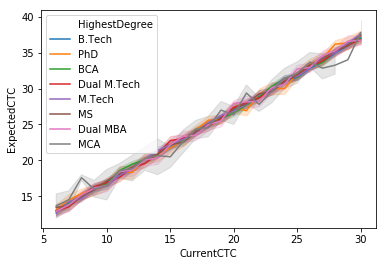

In [42]:
sns.lineplot(numerical_df['CurrentCTC'],numerical_df['ExpectedCTC'],hue=categorical_df['HighestDegree'])
plt.show()

## Below two graphs explains B.tech is the highest degree for most of the employees.

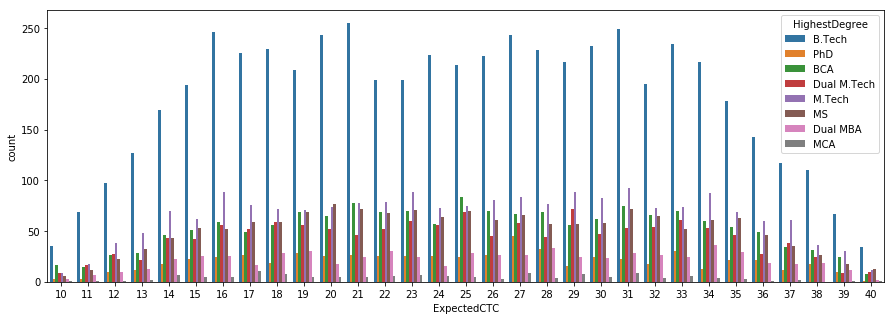

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(numerical_df['ExpectedCTC'],hue=categorical_df['HighestDegree'])
plt.show()

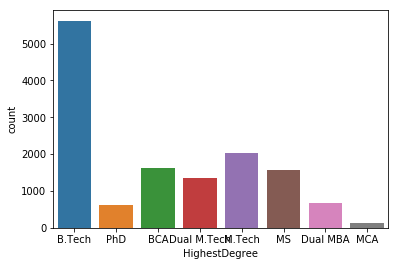

In [44]:
sns.countplot(categorical_df['HighestDegree'])

## Below graphs explains most of the employees are from Tier2  Graduating Institute

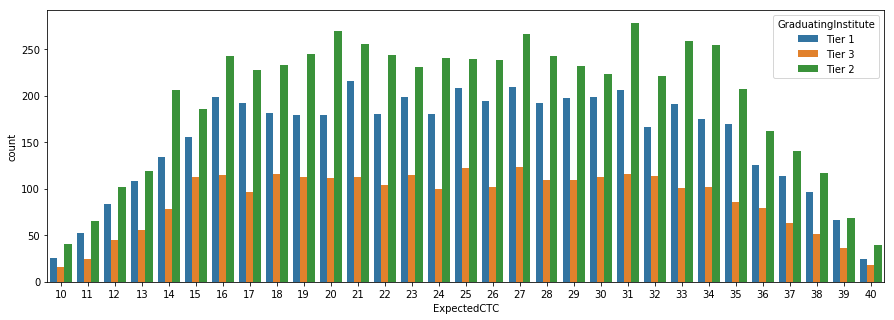

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(numerical_df['ExpectedCTC'],hue=categorical_df['GraduatingInstitute'])
plt.show()

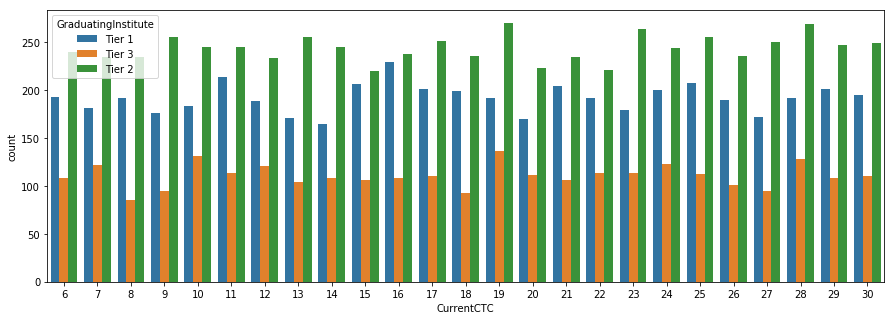

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(numerical_df['CurrentCTC'],hue=categorical_df['GraduatingInstitute'])
plt.show()

## Most of the employees carry 7 as their CGPA score and their current salaries are shown in below graph

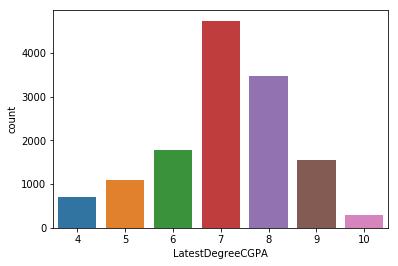

In [47]:
sns.countplot(numerical_df['LatestDegreeCGPA'])
plt.show()

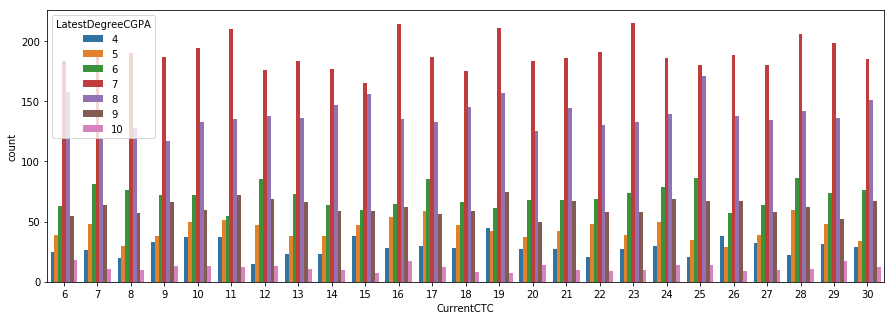

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(numerical_df['CurrentCTC'],hue=numerical_df['LatestDegreeCGPA'])
plt.show()

## Most of the employees Designation is SDE who has CGPA of 7 in their Degree and most of them have B.tech as their Degree

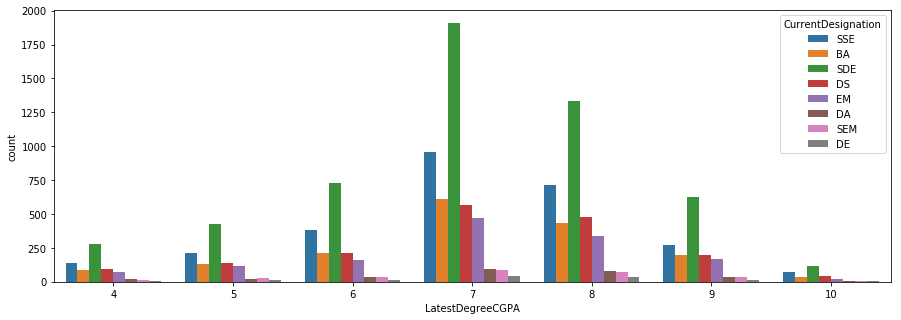

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(hue=categorical_df['CurrentDesignation'],x=numerical_df['LatestDegreeCGPA'])
plt.show()

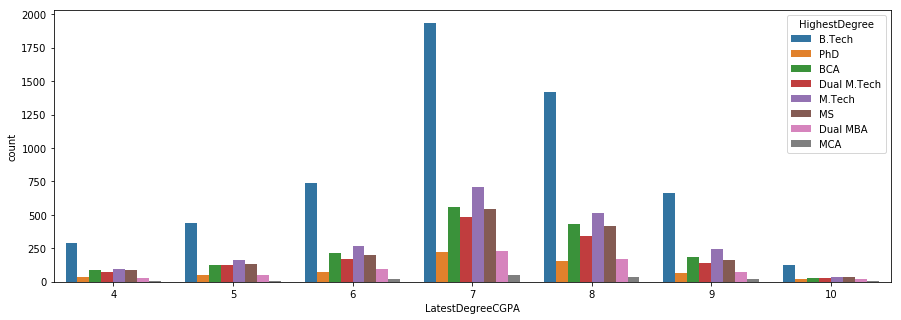

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(hue=categorical_df['HighestDegree'],x=numerical_df['LatestDegreeCGPA'])
plt.show()

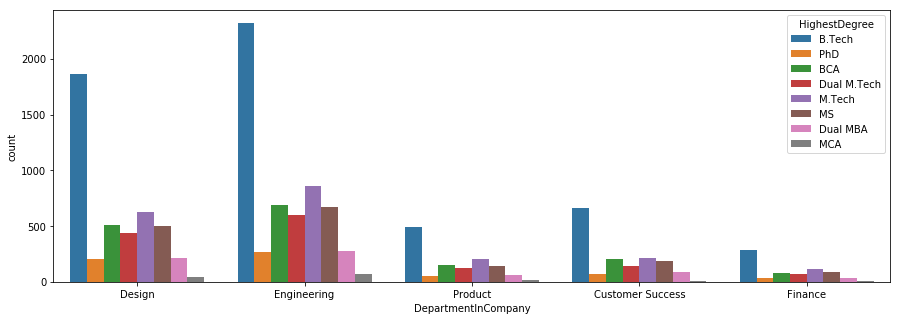

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(hue=categorical_df['HighestDegree'],x=categorical_df['DepartmentInCompany'])
plt.show()

## Checking the correlation of Continous Variables to examine any multicollinearity between variables - where Age and Graduation Year show high negative multicollinearity between them

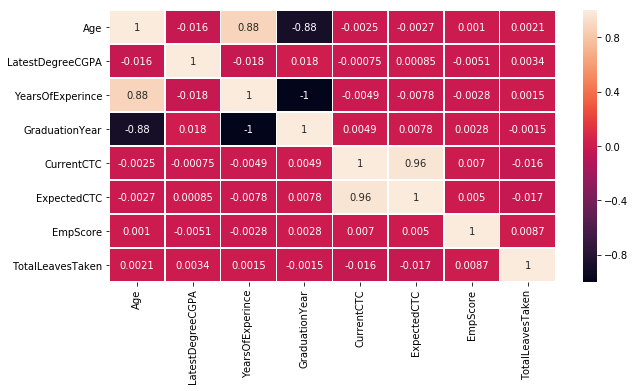

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(numerical_df.corr(),linewidths=.5,annot=True)
plt.show()

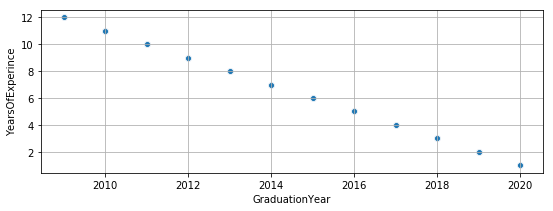

In [53]:
plt.figure(figsize=(9,3))
plt.grid()
sns.scatterplot(numerical_df['GraduationYear'],numerical_df['YearsOfExperince'])
plt.show()

## Outlier Analysis on all continous variable 

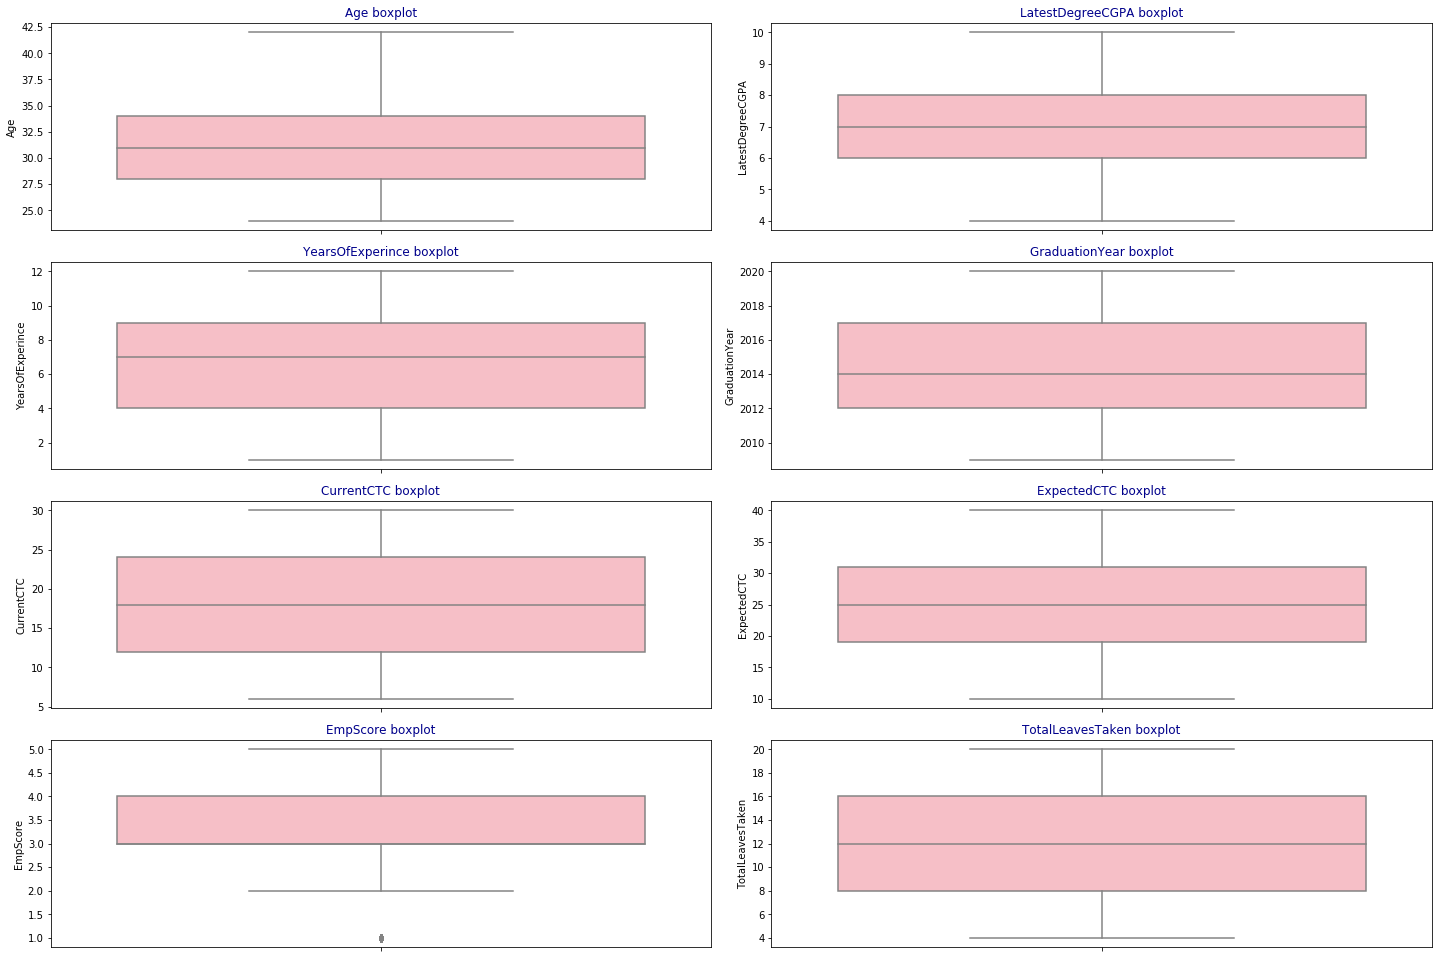

In [54]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(numerical_df.columns):
    ax=fig.add_subplot(6,2,i+1)
    sns.boxplot(x=str(feature),data=numerical_df,orient='v',color='lightpink')
    ax.set_title(feature+" boxplot",color='Darkblue')

fig.tight_layout()

In [55]:
categorical_df['EmpName'].nunique()

1766

In [56]:
categorical_df = categorical_df.drop('EmpName',axis=1)

In [57]:
categorical_df['LanguageOfCommunication'].unique()

array(['English', 'Native', 'Hindi'], dtype=object)

In [58]:
train['BiasInfluentialFactor'].unique()

array(['YearsOfExperince', nan, 'Gender', 'DegreeBranch',
       'CurrentCompanyType', 'MartialStatus', 'HighestDegree', 'EmpScore',
       'Ethinicity', 'LatestDegreeCGPA'], dtype=object)

In [59]:
# pd.to_numeric(numerical_df['GraduationYear'], errors='coerce')

## Understanding distribution of continous data as there are no outliers in continous variables

Below Graphs shows no problem in distribution of data

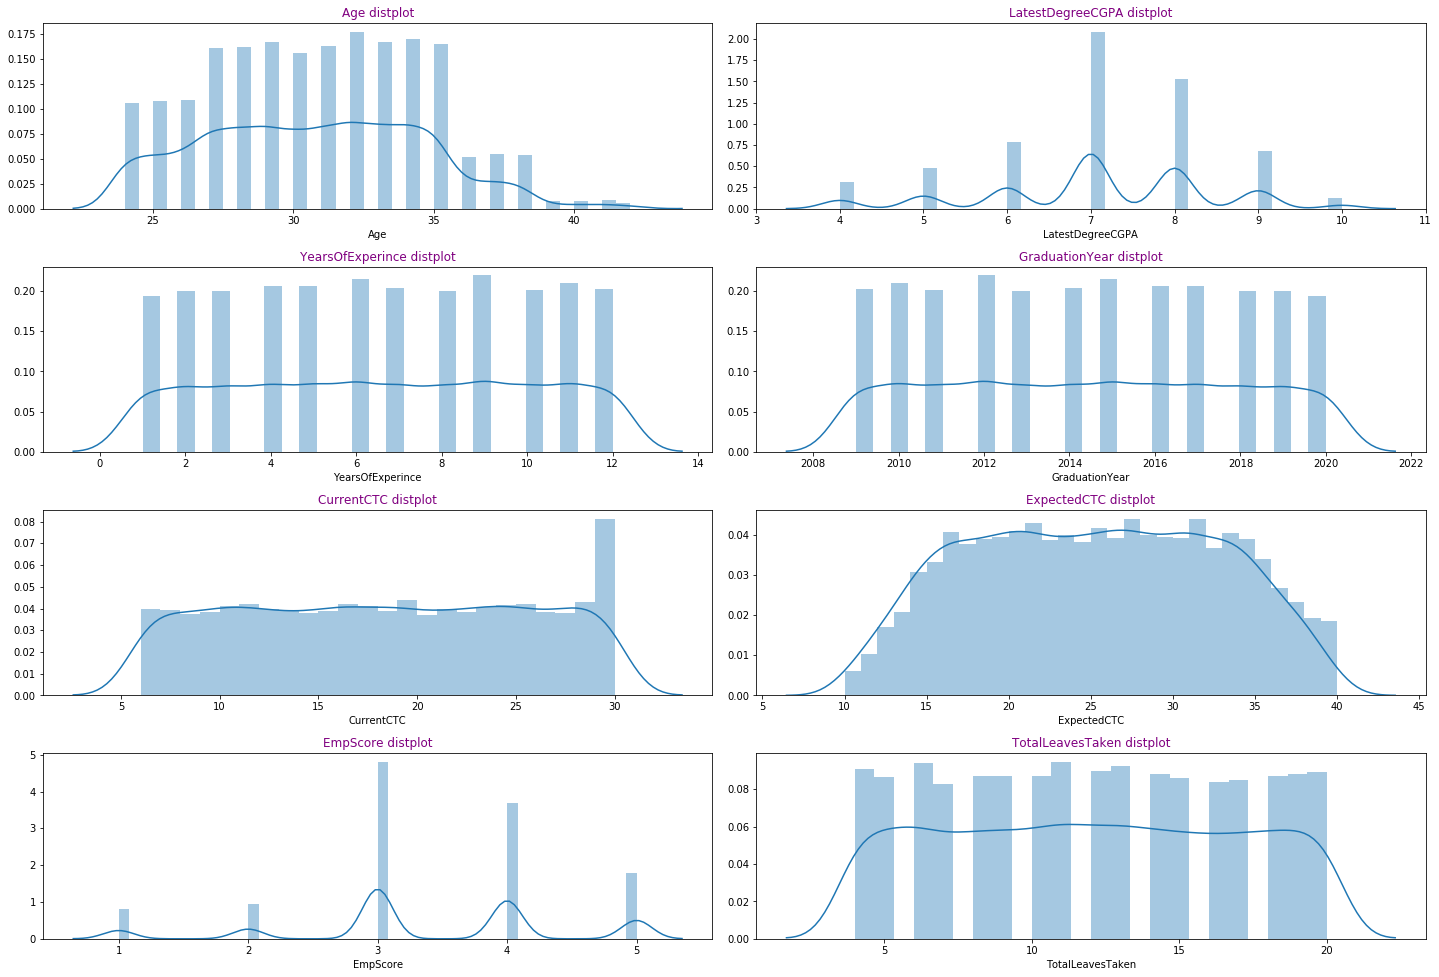

In [60]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(numerical_df.columns):
    ax=fig.add_subplot(6,2,i+1)
    sns.distplot(numerical_df[feature])
    ax.set_title(feature+" distplot",color='Purple')

fig.tight_layout()

In [61]:
numerical_df.insert(len(numerical_df.columns),'FitmentPercent',train['FitmentPercent'])

## Corelation between variables with comparison on predictor 

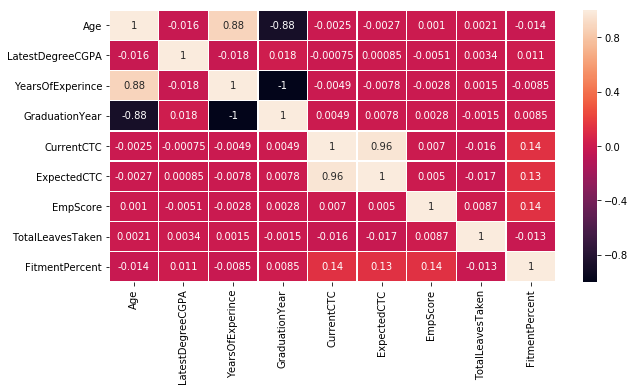

In [62]:
plt.figure(figsize=(10,5))
sns.heatmap(numerical_df.corr(),annot=True,linewidths=0.5)
plt.show()

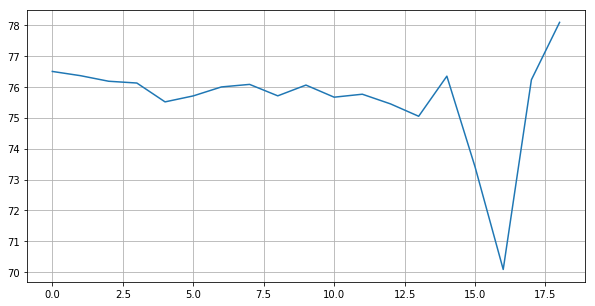

In [63]:
numerical_df.groupby('Age')['FitmentPercent'].mean().sort_index().reset_index()['FitmentPercent'].plot(figsize = (10, 5), grid = True)

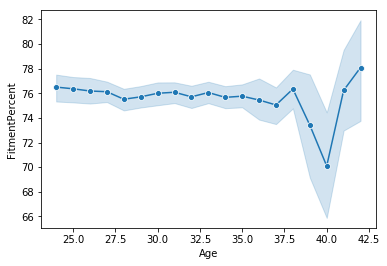

In [64]:
sns.lineplot(numerical_df['Age'],numerical_df['FitmentPercent'],marker='o')
plt.show()

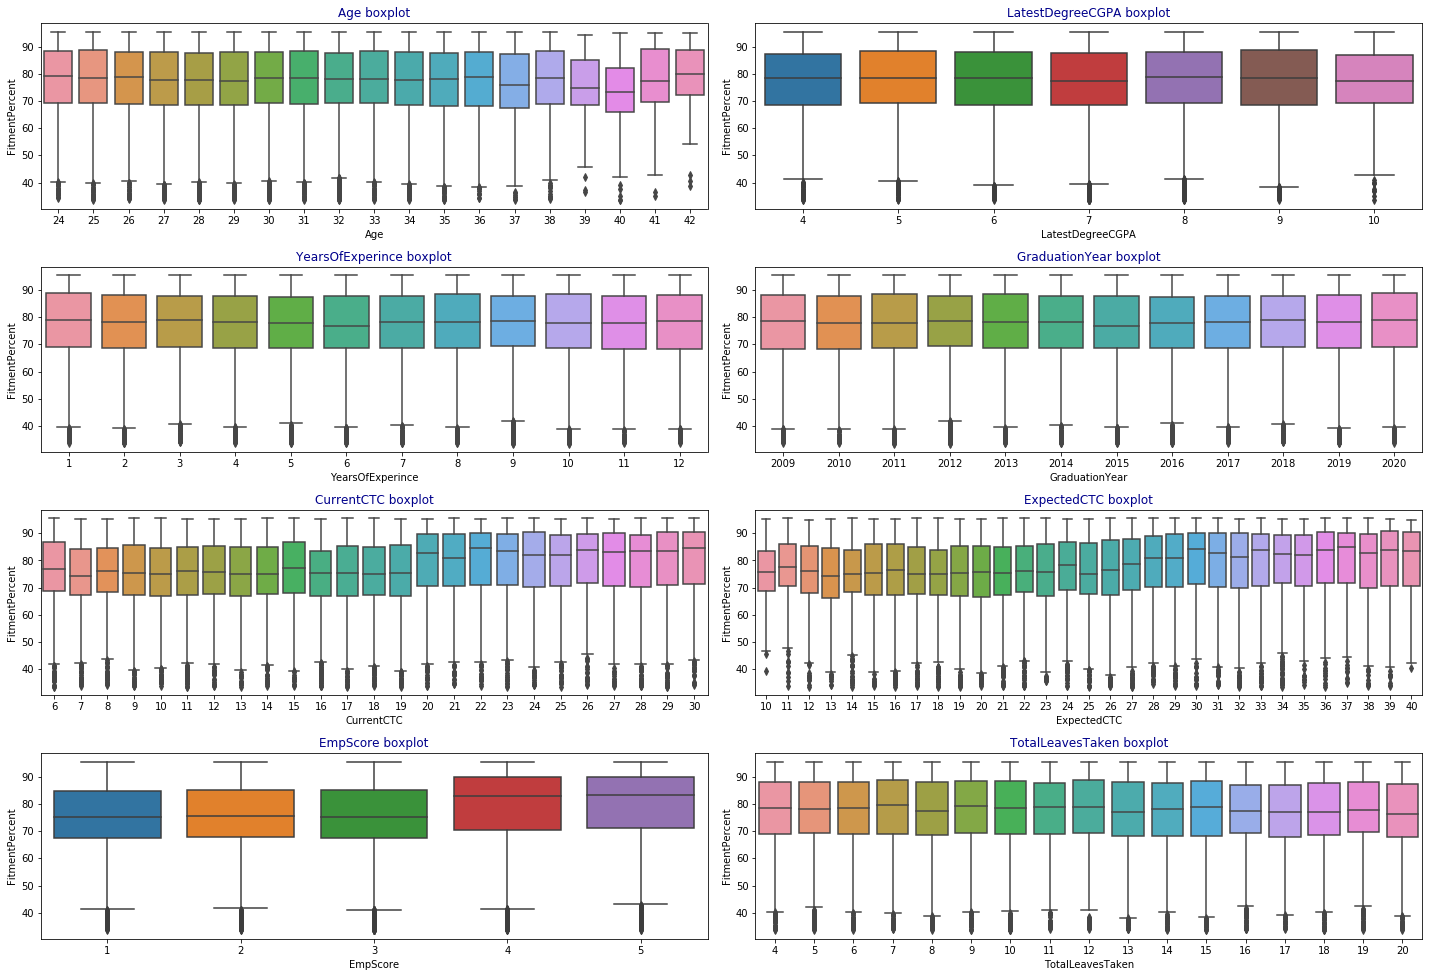

In [65]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(numerical_df.columns[:-1]):
    ax=fig.add_subplot(6,2,i+1)
    sns.boxplot(x=numerical_df[feature],y=numerical_df['FitmentPercent'])
    ax.set_title(feature+" boxplot",color='Darkblue')

fig.tight_layout()

## As could see Age variable has multicollinearity problem and it doesnt carry much information for predictor variable hence dropping Age variable

In [66]:
numerical_df = numerical_df.drop('Age',axis=1)

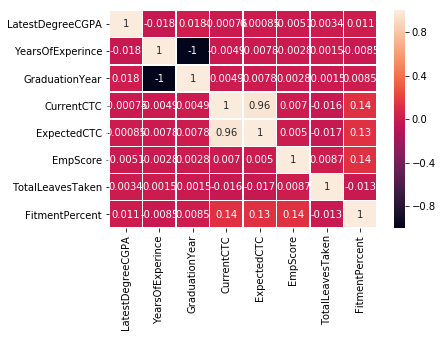

In [67]:
sns.heatmap(numerical_df.corr(),linewidths=.5,annot=True)

## Below graph shows how Years of Experience and Graduation Year plays a vital role with Predictor Variable

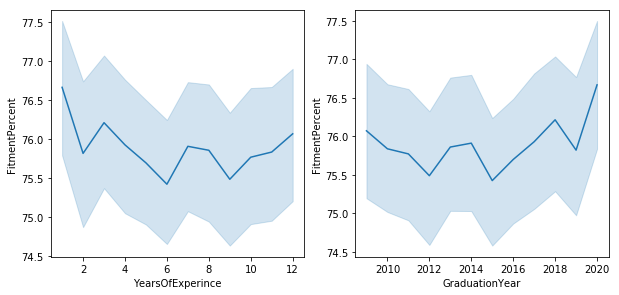

In [68]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(2,2,0+1)
sns.lineplot(numerical_df['YearsOfExperince'],numerical_df['FitmentPercent'])
ax=fig.add_subplot(2,2,1+1)
sns.lineplot(numerical_df['GraduationYear'],numerical_df['FitmentPercent'])
plt.show()

## As Graduation Year may cause bias to the model due to its high values and Years of Experience is more reliable on Predictor Variable hence dropping Graduation Year

In [69]:
numerical_df = numerical_df.drop('GraduationYear',axis=1)

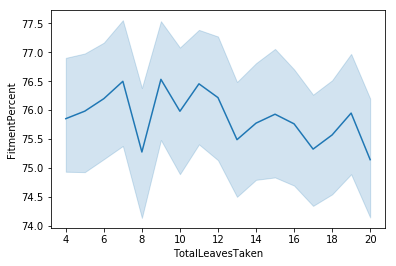

In [70]:
sns.lineplot(numerical_df['TotalLeavesTaken'],numerical_df['FitmentPercent'])
plt.show()

In [71]:
numerical_df.columns

Index([u'LatestDegreeCGPA', u'YearsOfExperince', u'CurrentCTC', u'ExpectedCTC',
       u'EmpScore', u'TotalLeavesTaken', u'FitmentPercent'],
      dtype='object')

## VIF Analysis

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numerical_df.values, i) for i in range(len(numerical_df.columns))]
  
print(vif_data)

            feature         VIF
0  LatestDegreeCGPA   19.729535
1  YearsOfExperince    4.419452
2        CurrentCTC   91.882127
3       ExpectedCTC  145.865071
4          EmpScore   10.857465
5  TotalLeavesTaken    6.469152
6    FitmentPercent   21.916292


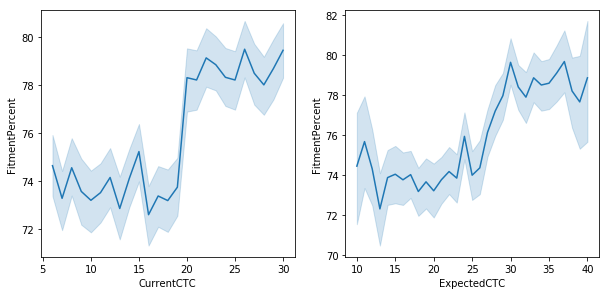

In [73]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(2,2,0+1)
sns.lineplot(numerical_df['CurrentCTC'],numerical_df['FitmentPercent'])
ax=fig.add_subplot(2,2,1+1)
sns.lineplot(numerical_df['ExpectedCTC'],numerical_df['FitmentPercent'])
plt.show()

In [74]:
numerical_df=numerical_df.drop('ExpectedCTC',axis=1)

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numerical_df.values, i) for i in range(len(numerical_df.columns))]
  
print(vif_data)

            feature        VIF
0  LatestDegreeCGPA  18.135973
1  YearsOfExperince   4.390177
2        CurrentCTC   7.077234
3          EmpScore  10.721529
4  TotalLeavesTaken   6.396150
5    FitmentPercent  20.916267


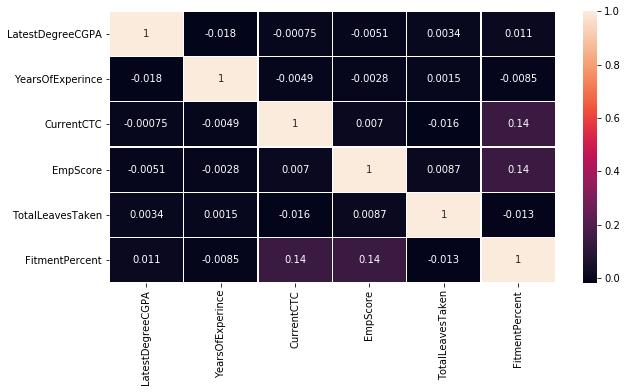

In [76]:
plt.figure(figsize=(10,5))
sns.heatmap(numerical_df.corr(),annot=True,linewidths=0.5)
plt.show()

In [77]:
#Now lets look at categorical_df

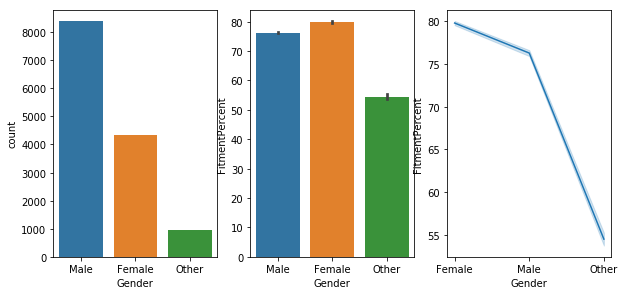

In [78]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(2,3,0+1)
sns.countplot(categorical_df['Gender'])
ax=fig.add_subplot(2,3,1+1)
sns.barplot(categorical_df['Gender'],numerical_df['FitmentPercent'])
ax=fig.add_subplot(2,3,1+2)
sns.lineplot(categorical_df['Gender'],numerical_df['FitmentPercent'])
plt.show()

In [79]:
categorical_df.columns

Index([u'LanguageOfCommunication', u'Gender', u'JobProfileIDApplyingFor',
       u'HighestDegree', u'DegreeBranch', u'GraduatingInstitute',
       u'MartialStatus', u'CurrentDesignation', u'CurrentCompanyType',
       u'DepartmentInCompany'],
      dtype='object')

In [80]:
categorical_df = categorical_df.drop('LanguageOfCommunication',axis=1)
categorical_df = categorical_df.drop('JobProfileIDApplyingFor',axis=1)

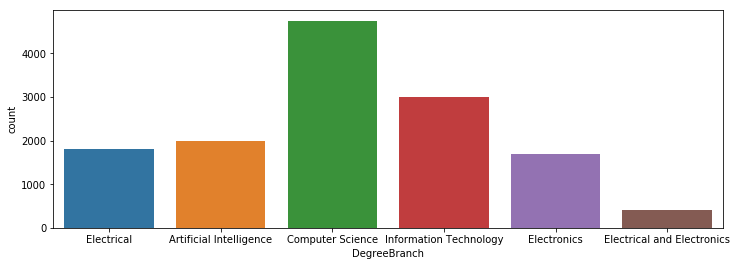

In [81]:
fig=plt.figure(figsize=(12,4))
sns.countplot(categorical_df['DegreeBranch'])
plt.show()

## Even though Computer Science is highest degree branch for most of employees Electrical and Electronics have most fitment percentage .

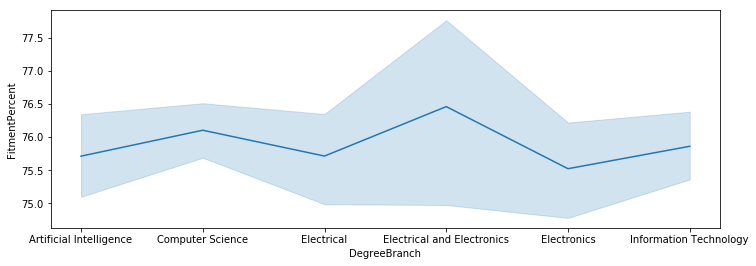

In [82]:
fig=plt.figure(figsize=(12,4))
sns.lineplot(categorical_df['DegreeBranch'],numerical_df['FitmentPercent'])
plt.show()

## Below plot explains how categorical data is related to Predictor and each categorical variable importance towards predictor

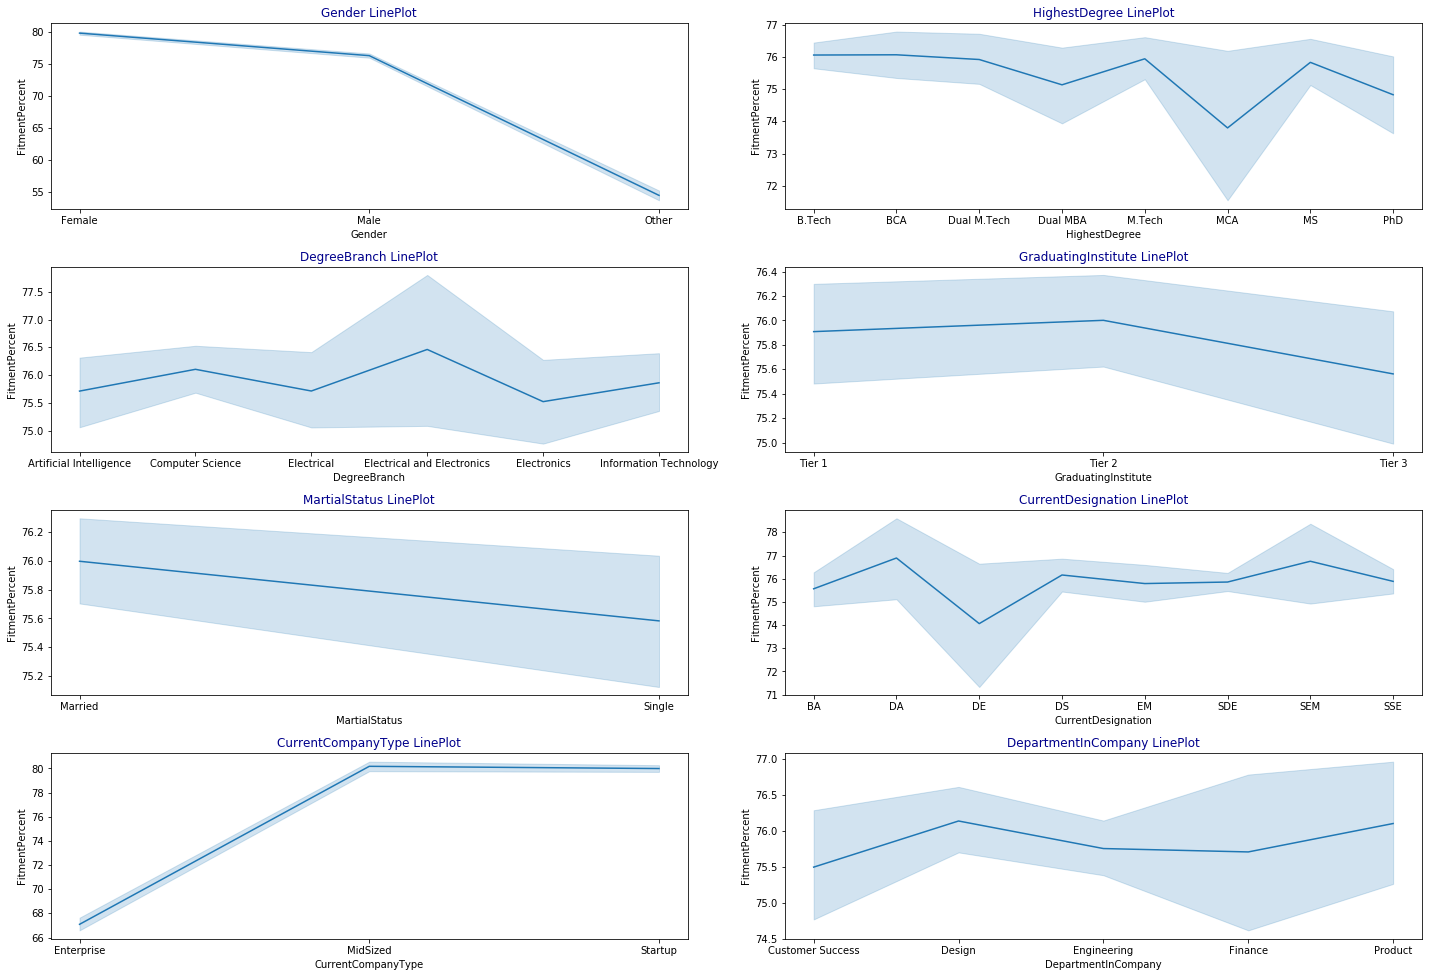

In [83]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(categorical_df.columns):
    ax=fig.add_subplot(6,2,i+1)
    sns.lineplot(x=categorical_df[feature],y=numerical_df['FitmentPercent'])
    ax.set_title(feature+" LinePlot",color='Darkblue')

fig.tight_layout()

## Number of Classes in each Categorical Variable

In [84]:
value_counts = pd.DataFrame()
value_counts["feature"] = categorical_df.columns  
value_counts["values"] = [categorical_df[i].nunique() for i in categorical_df.columns]  
value_counts

,feature,values
0,Gender,3
1,HighestDegree,8
2,DegreeBranch,6
3,GraduatingInstitute,3
4,MartialStatus,2
5,CurrentDesignation,8
6,CurrentCompanyType,3
7,DepartmentInCompany,5


In [85]:
value_counts['values'].sum()

38

In [87]:
# categorical_df.insert(len(categorical_df.columns),'FitmentPercent',train['FitmentPercent'])
# categorical_df.corr()

In [88]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# for i in categorical_df.columns:
#     categorical_df[i]= label_encoder.fit_transform(categorical_df[i])


In [89]:
# sns.heatmap(categorical_df.corr(),linewidths=.5,annot=True)

In [90]:
categorical_df = categorical_df.drop('DepartmentInCompany',axis=1)

In [91]:
# sns.heatmap(categorical_df.corr(),linewidths=.5,annot=True)

In [92]:
categorical_df = pd.get_dummies(categorical_df,columns=categorical_df.columns)

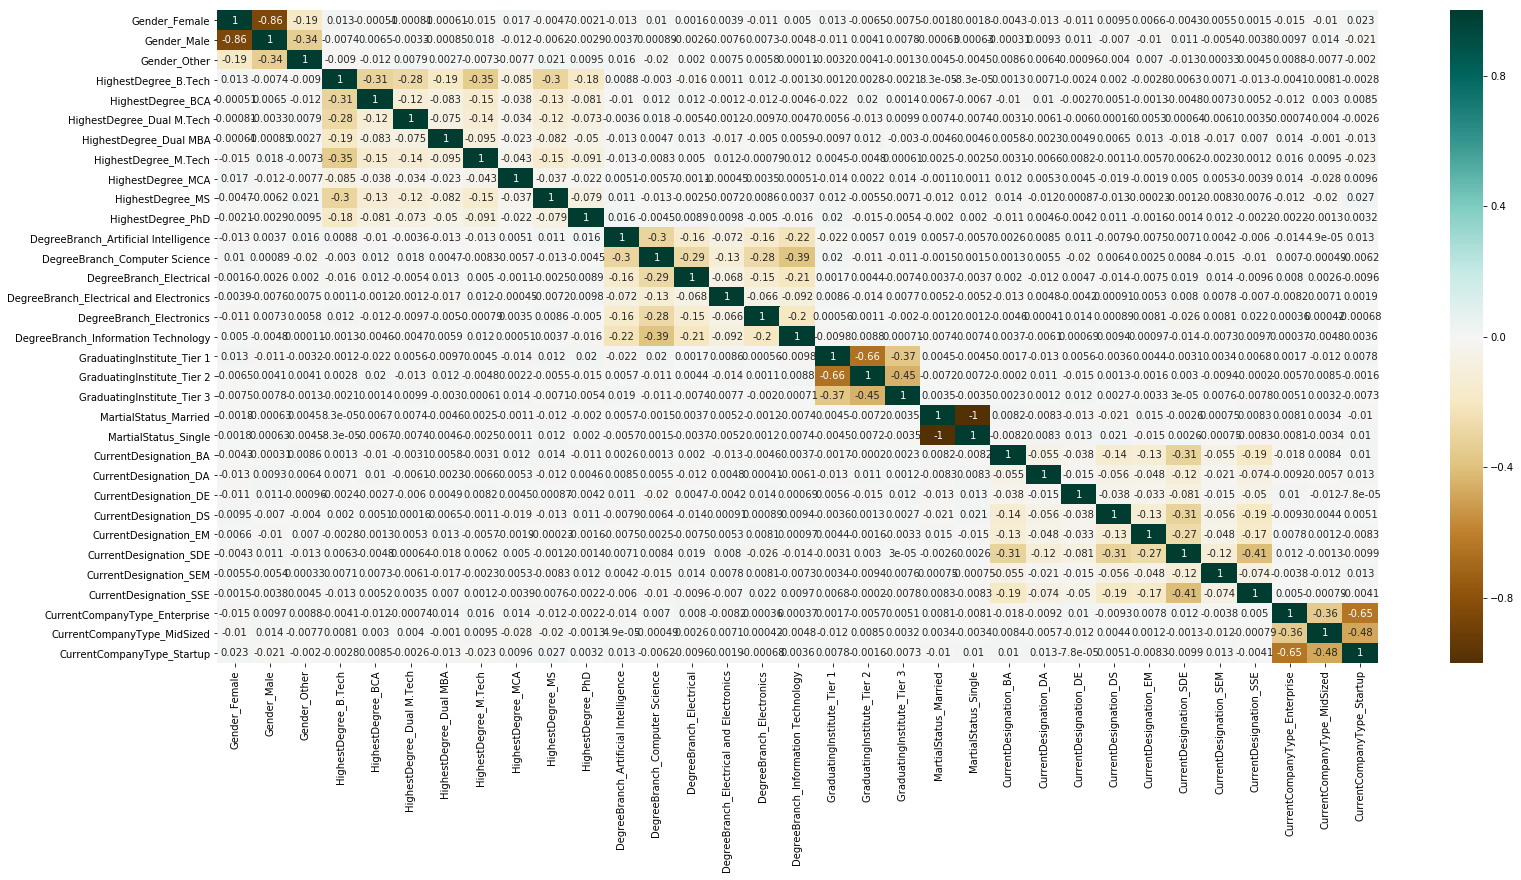

In [93]:
plt.figure(figsize=(26, 12))
sns.heatmap(categorical_df.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
plt.show()

In [94]:
categorical_df.insert(loc = categorical_df.shape[1],column='LatestDegreeCGPA',value = numerical_df['LatestDegreeCGPA'])
categorical_df.insert(loc = categorical_df.shape[1],column='YearsOfExperince',value = numerical_df['YearsOfExperince'])
categorical_df.insert(loc = categorical_df.shape[1],column='CurrentCTC',value = numerical_df['CurrentCTC'])
categorical_df.insert(loc = categorical_df.shape[1],column='EmpScore',value = numerical_df['EmpScore'])
categorical_df.insert(loc = categorical_df.shape[1],column='TotalLeavesTaken',value = numerical_df['TotalLeavesTaken'])
categorical_df.insert(loc = categorical_df.shape[1],column='FitmentPercent',value = numerical_df['FitmentPercent'])

In [95]:
X = categorical_df.iloc[:,:-1]
y = numerical_df['FitmentPercent']

In [96]:
test = pd.read_csv('Test.csv')
test.columns

Index([u'EmpID', u'EmpName', u'LanguageOfCommunication', u'Age', u'Gender',
       u'JobProfileIDApplyingFor', u'HighestDegree', u'DegreeBranch',
       u'GraduatingInstitute', u'LatestDegreeCGPA', u'YearsOfExperince',
       u'GraduationYear', u'CurrentCTC', u'ExpectedCTC', u'MartialStatus',
       u'EmpScore', u'CurrentDesignation', u'CurrentCompanyType',
       u'DepartmentInCompany', u'TotalLeavesTaken'],
      dtype='object')

In [97]:
test = test.drop('EmpID',axis=1)
test = test.drop('EmpName',axis=1)
test = test.drop('Age',axis=1)
test = test.drop('JobProfileIDApplyingFor',axis=1)
test = test.drop('ExpectedCTC',axis=1)
test = test.drop('DepartmentInCompany',axis=1)
test = test.drop('LanguageOfCommunication',axis=1)

In [98]:
categorical.remove('LanguageOfCommunication')
categorical.remove('EmpName')
categorical.remove('JobProfileIDApplyingFor')
categorical.remove('DepartmentInCompany')

In [99]:
test_categorical_df = pd.get_dummies(test,columns=categorical)
test_categorical_df = test_categorical_df.drop('GraduationYear',axis=1)
len(X.columns) == len(test_categorical_df.columns)

True

In [100]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

## Graphs of Actual Values and Predicted Values for each Model

## Linear Regression

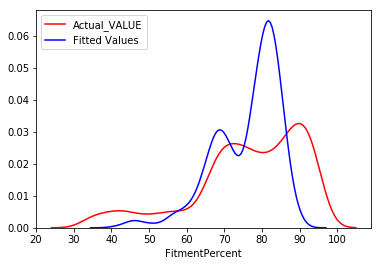

In [101]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_valid)
ax1 = sns.distplot(y_valid, hist = False ,color = 'r',label = 'Actual_VALUE')
sns.distplot(y_pred, hist = False ,color ='b' ,label = 'Fitted Values',ax=ax1)
plt.show()

## Lasso

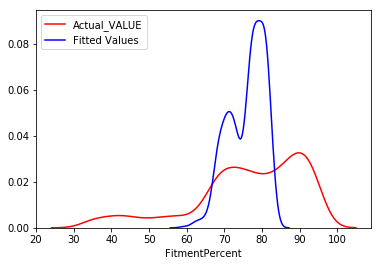

In [102]:
model = Lasso()
model.fit(X_train,y_train)
y_pred = model.predict(X_valid)
ax1 = sns.distplot(y_valid, hist = False ,color = 'r',label = 'Actual_VALUE')
sns.distplot(y_pred, hist = False ,color ='b' ,label = 'Fitted Values',ax=ax1)
plt.show()

## Ridge Regression

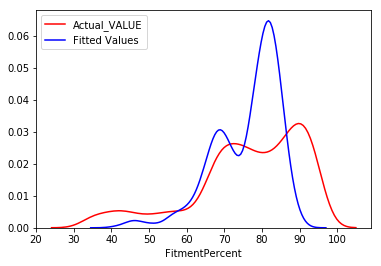

In [103]:
model = Ridge()
model.fit(X_train,y_train)
y_pred = model.predict(X_valid)
ax1 = sns.distplot(y_valid, hist = False ,color = 'r',label = 'Actual_VALUE')
sns.distplot(y_pred, hist = False ,color ='b' ,label = 'Fitted Values',ax=ax1)
plt.show()

## Decision Tree Regression

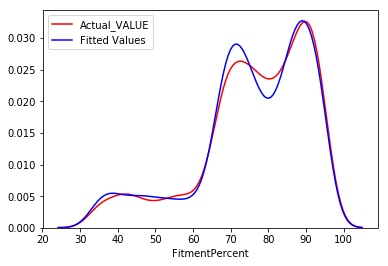

In [104]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_valid)
ax1 = sns.distplot(y_valid, hist = False ,color = 'r',label = 'Actual_VALUE')
sns.distplot(y_pred, hist = False ,color ='b' ,label = 'Fitted Values',ax=ax1)
plt.show()

## Random Forest Regressor

C:\Users\942052\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


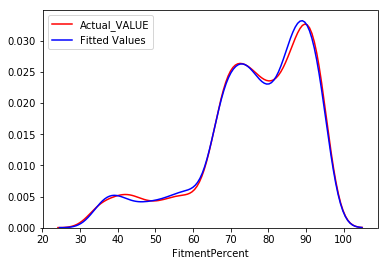

In [105]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_valid)
ax1 = sns.distplot(y_valid, hist = False ,color = 'r',label = 'Actual_VALUE')
sns.distplot(y_pred, hist = False ,color ='b' ,label = 'Fitted Values',ax=ax1)
plt.show()

## XGBOOST Regression

In [106]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0,n_estimators=1500,max_depth=10) 
xgbr.fit(X_train,y_train)
score = xgbr.score(X_train,y_train)  
print("Training score: ", score)

('Training score: ', 0.9999998582787347)


In [107]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(xgbr, X_train, y_train,cv=5)
# print("Mean cross-validation score: %.2f" % scores.mean())

In [108]:
from sklearn.metrics import mean_squared_error
ypred = xgbr.predict(X_valid)
mse = mean_squared_error(y_valid, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 95.11
RMSE: 9.75


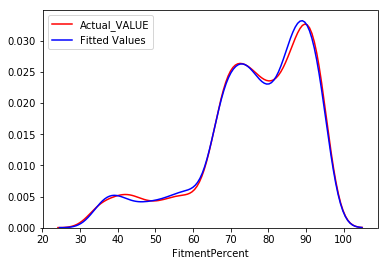

In [109]:
ax1 = sns.distplot(y_valid, hist = False ,color = 'r',label = 'Actual_VALUE')
sns.distplot(y_pred, hist = False ,color ='b' ,label = 'Fitted Values',ax=ax1)
plt.show()

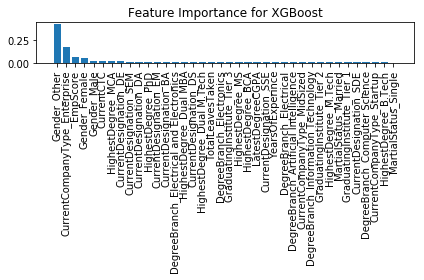

In [110]:
importances = xgbr.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance for XGBoost')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [112]:
test = pd.read_csv('Test.csv')
X_train = categorical_df.iloc[:,:-1]
y_train = numerical_df['FitmentPercent']
model.fit(X_train,y_train)
y_pred = model.predict(test_categorical_df)
submission_df = pd.DataFrame()
submission_df['EmpID'] = test['EmpID']
submission_df['FitmentPercent'] = y_pred
submission = submission_df.to_csv('submission_rf.csv')

In [115]:
X_train = categorical_df.iloc[:,:-1]
y_train = numerical_df['FitmentPercent']
xgbr.fit(X_train,y_train)

In [116]:
test_categorical_df = test_categorical_df[X_train.columns]
y_pred = xgbr.predict(test_categorical_df)
submission_df = pd.DataFrame()
submission_df['EmpID'] = test['EmpID']
submission_df['FitmentPercent'] = y_pred
submission = submission_df.to_csv('submission_xgb.csv')

## As above model predicted Fitment Percent to get the Bias Influential Factor using the same dataset which is finalised by above EDA as it plays the vital role on Fitment Percent

In [123]:
train['BiasInfluentialFactor'] = train['BiasInfluentialFactor'].fillna(value='Unknown')

In [125]:
train['BiasInfluentialFactor'].isnull().sum()

0

In [179]:
X = categorical_df.iloc[:,:-1]
Y = train['BiasInfluentialFactor']

In [128]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# Y= label_encoder.fit_transform(Y)

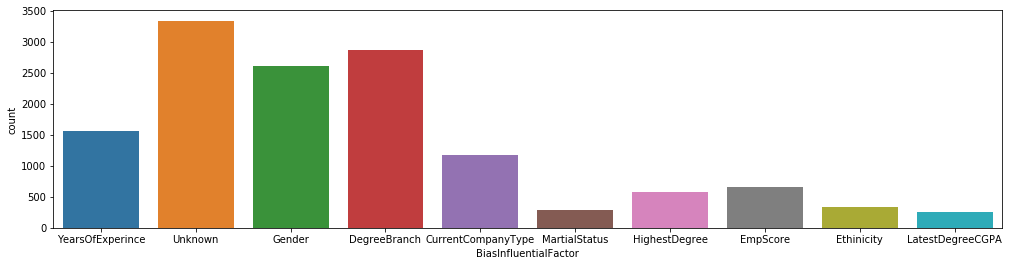

In [150]:
plt.figure(figsize=(17, 4))
sns.countplot(Y)
plt.show()

In [180]:
X = X_train
Y = y_train

## Random Forest Classifier to predict Bias Influential Factor

In [181]:
from sklearn import metrics  
from sklearn.ensemble import RandomForestClassifier
# X_train,X_valid,y_train,y_valid = train_test_split(X,Y,test_size=0.2,random_state=22)
clf = RandomForestClassifier(n_estimators =89)  
clf.fit(X_train, y_train)
y_pred = clf.predict(test_categorical_df)
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_valid, y_pred))

In [182]:
submission_rf = pd.read_csv('submission_rf.csv')
submission_rf['BiasInfluentialFactor'] = y_pred
submission_rf = submission_rf.to_csv('submission_rf.csv')

## XGBoost Forest Classifier to predict Bias Influential Factor

In [183]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=20, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(test_categorical_df)
# print(metrics.classification_report(y_valid, prediction))
# print(metrics.confusion_matrix(y_valid, prediction))
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_valid, y_pred))

C:\Users\942052\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [185]:
submission_xgb = pd.read_csv('submission_xgb.csv')
submission_xgb['BiasInfluentialFactor'] = prediction
submission_xgb = submission_xgb.to_csv('submission_xgb.csv')

In [186]:
submission_xgb = pd.read_csv('submission_xgb.csv')
for i in range(len(submission_xgb)):
    if submission_xgb['BiasInfluentialFactor'][i] == 'Unknown':
        submission_xgb['BiasInfluentialFactor'][i] = None

In [187]:
submission_xgb = submission_xgb.to_csv('submission_xgb2.csv')

In [188]:
submission_rf = pd.read_csv('submission_rf.csv')
for i in range(len(submission_rf)):
    if submission_rf['BiasInfluentialFactor'][i] == 'Unknown':
        submission_rf['BiasInfluentialFactor'][i] = None

In [189]:
submission_rf = submission_rf.to_csv('submission_rf2.csv')